1️⃣ Import Libraries

In [9]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

# Add the parent folder to sys.path so Python can find src
os.chdir(os.path.abspath(".."))
sys.path.append(os.path.abspath("src"))  
# Config
sns.set(style="whitegrid")

2️⃣ Load Raw Data

In [10]:
from src.data_processing import load_raw_data, clean_data, save_processed_data

# Load the raw SLA dataset
df = load_raw_data("data/raw/sla_cases.csv")

# Basic cleaning
df = clean_data(df)

# Preview the data
df.head()

,case_id,case_type,country,processing_stage,officer_id,officer_load,documents_missing,duration_days,sla_days,breached
0,1,Immigration,UK,Closure,106,22,5,18,7,True
1,2,Relocation,UK,Intake,103,18,1,24,21,True
2,3,Payroll,CA,Closure,107,25,0,20,10,True
3,4,Immigration,US,Review,104,5,5,8,14,True
4,5,Tax,US,Closure,106,21,0,19,7,True


3️⃣ Dataset Overview

Number of rows and columns: (5000, 10)

Data Types:
 case_id               int64
case_type            object
country              object
processing_stage     object
officer_id            int64
officer_load          int64
documents_missing     int64
duration_days         int64
sla_days              int64
breached               bool
dtype: object

Missing Values:
 case_id              0
case_type            0
country              0
processing_stage     0
officer_id           0
officer_load         0
documents_missing    0
duration_days        0
sla_days             0
breached             0
dtype: int64

SLA Breach Distribution:
 breached
True     2900
False    2100
Name: count, dtype: int64


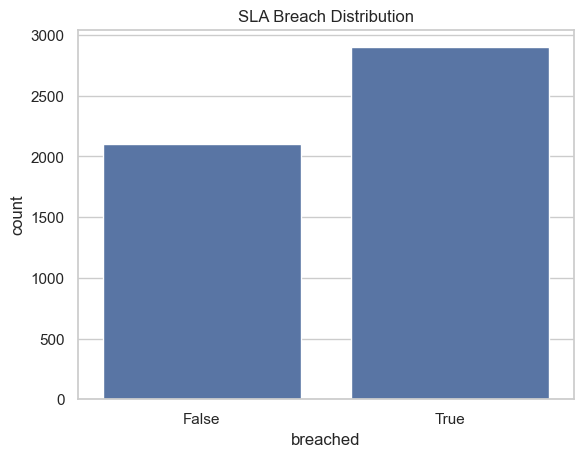

In [11]:
# Dataset shape
print("Number of rows and columns:", df.shape)

# Data types
print("\nData Types:\n", df.dtypes)

# Missing values
print("\nMissing Values:\n", df.isnull().sum())

# Target distribution
print("\nSLA Breach Distribution:\n", df['breached'].value_counts())
sns.countplot(x='breached', data=df)
plt.title("SLA Breach Distribution")
plt.show()

4️⃣ Summary Statistics

In [12]:
# Numeric summary
df.describe()

# Categorical summary
categorical_cols = ['case_type', 'country', 'processing_stage']
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())


Value counts for case_type:
 case_type
Relocation     1306
Immigration    1247
Payroll        1226
Tax            1221
Name: count, dtype: int64

Value counts for country:
 country
US    1329
UK    1239
DE    1234
CA    1198
Name: count, dtype: int64

Value counts for processing_stage:
 processing_stage
Closure     1286
Review      1280
Approval    1218
Intake      1216
Name: count, dtype: int64
